
# **Import dei dati e loro rappresentazione**

Importiamo il dataset utilizzato in questo laboratorio: **spam.csv**

In [1]:
import pandas as pd

df = pd.read_csv("dat/spam.csv")
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.dtypes

type    object
text    object
dtype: object

In [3]:
#Dobbiamo specificare il tipo corretto di dato che andremo ad utilizzare
df["type"] = df["type"].astype("category")
df["text"] = df["text"].astype(str)

Per poter lavorare con il testo, useremo la libreria **NLTK**, grazie alla sarà possibile pulire il testo di ciascun sms da parole non importanti, come ad esempio i numeri, e costruire una matrice "**document-term matrix**", ovvero una matrice dove le righe rappresentano gli sms e le colonne rappresentano le parole che verranno usate per effettuare il training del modello Naive Bayes.





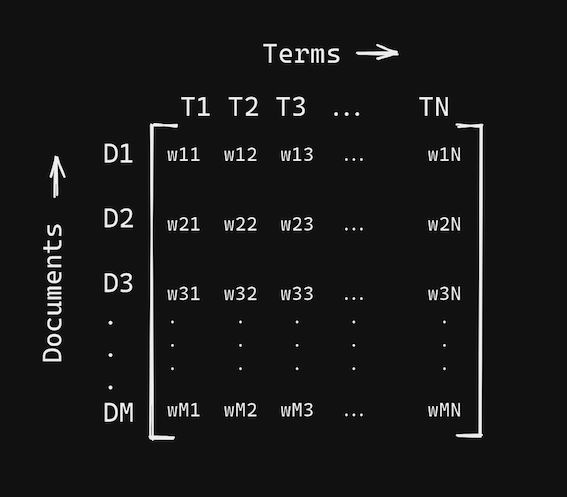

Per prima cosa, importiamo alcune librerie

In [5]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download delle stopwords e del wordnet corpus di nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Davoleo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Davoleo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Davoleo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Davoleo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Davoleo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

# **Pre-processing del testo**

In [21]:
# Preprocessing del testo
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**1. Convertiamo il testo in lowercase**

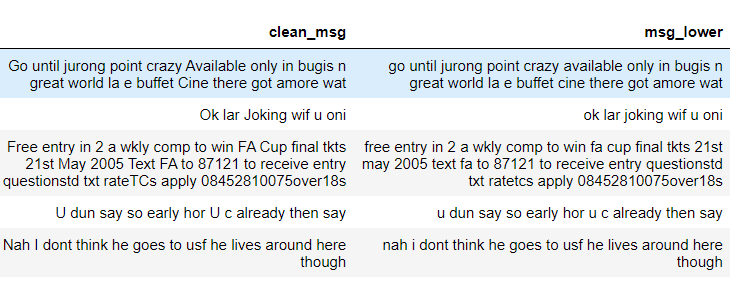**






In [22]:
df['text'] = df['text'].str.lower()
df.head()


,type,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


**2. Rimuoviamo i numeri**

In [23]:
df['text'] = df['text'].str.replace('\d+', '')
df.head()

,type,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


**3. Tokenizzazione**

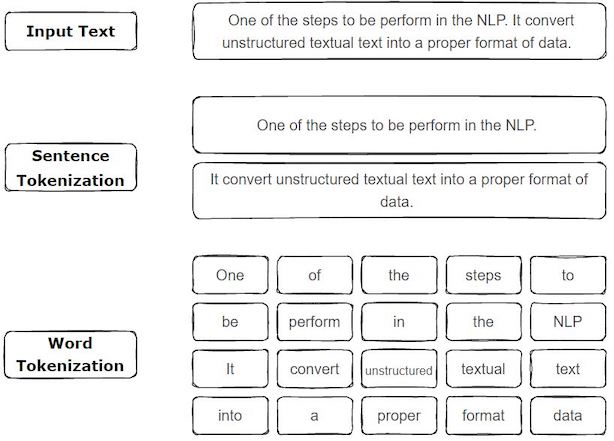

In [24]:
df['text'] = df['text'].apply(word_tokenize)
df.head()

,type,text
0,ham,"[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,ham,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


**4. Rimuoviamo le stopwords**

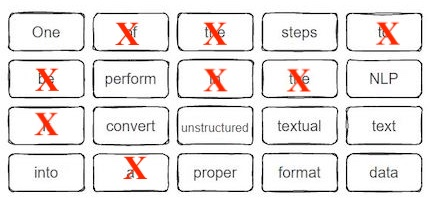

In [25]:
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,type,text
0,ham,"[go, jurong, point, ,, crazy, .., available, b..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"[nah, n't, think, goes, usf, ,, lives, around,..."


**5. Lemmatizzazione**

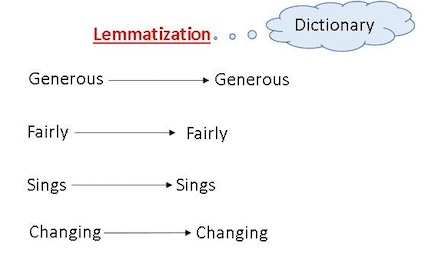

In [26]:
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,type,text
0,ham,"[go, jurong, point, ,, crazy, .., available, b..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"[nah, n't, think, go, usf, ,, life, around, th..."


**6. Rimozione della punteggiatura**

In [27]:
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in string.punctuation])
df.head()

,type,text
0,ham,"[go, jurong, point, crazy, .., available, bugi..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"[nah, n't, think, go, usf, life, around, though]"


**7. Conversione del contenuto sottoforma di stringa**

In [28]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))
df.head()

,type,text
0,ham,go jurong point crazy .. available bugis n gre...
1,ham,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor ... u c already say ...
4,ham,nah n't think go usf life around though


**8. Remove single character tokens**

In [29]:
def remove_single_char_func(text, threshold=2):
    '''
    Removes single characters from string, if present

    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)

    Args:
        text (str): String to which the functions are to be applied, string

    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    '''
    threshold = threshold

    words = word_tokenize(text)
#    print(words)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

In [30]:
df['text'] = df['text'].apply(remove_single_char_func)
df.head()

,type,text
0,ham,jurong point crazy available bugis great world...
1,ham,lar ... joking wif oni ...
2,spam,free entry wkly comp win cup final tkts 21st m...
3,ham,dun say early hor ... already say ...
4,ham,nah n't think usf life around though


# **Suddivisione in train/test e creazione delle word cloud**

In [31]:
from sklearn.model_selection import train_test_split

# Split del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.2, random_state=42)

In [ ]:
pip install wordcloud

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Creazione di una word cloud sul training set
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(X_train))

# Plot
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

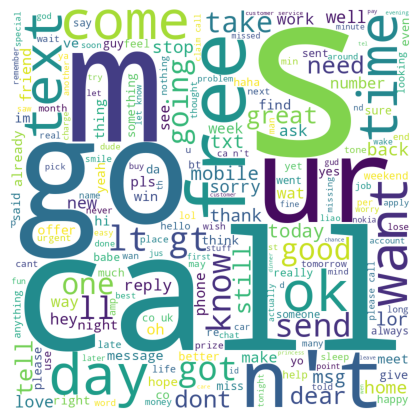

In [ ]:
# Creazione di una word cloud sul test set
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(X_test))

# Plot
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Eliminiamo le parole poco frequenti (che compaiono in meno di 5 sms)

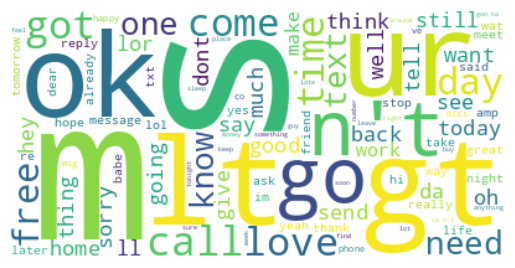

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Creiamo l'istanza del CountVectorizer con min_df=5
cv = CountVectorizer(min_df=5)

# Creiamo la rappresentazione vettoriale del corpus di training e di test
X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)

# Ricreiamo la word cloud
wordcloud = WordCloud(background_color='white', max_words=100).generate(' '.join(X_train))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Training del modello Naive Bayes

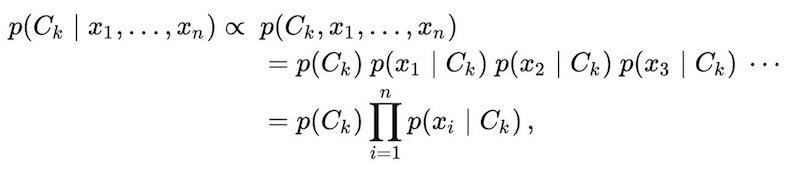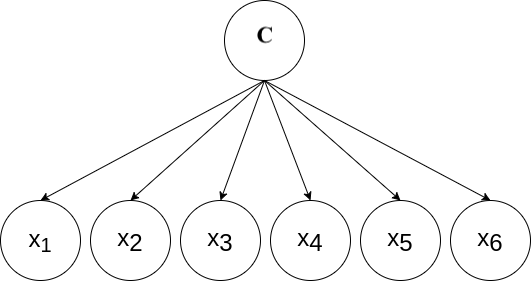




**Assignment 1**
- Confrontare le word cloud delle due classi utilizzando il training set

Ora creiamo il modello Naive Bayes sui dati di training e valutiamo le performance sui dati di test



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# creazione e addestramento del classificatore
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

# classificazione del test set
y_pred = clf.predict(X_test_bow)

# calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9739910313901345


**Assignment 2**


* Definisci un modello Naive Bayes con diversi tipi di spazi di input

* Discretizza i word counts

* Rimuovi le features con varianza 0

* Rimuovi le features con deviazione standard < -2σ e >2σ